# Visualise Canto Songs

In [1]:
! pip install librosa matplotlib numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


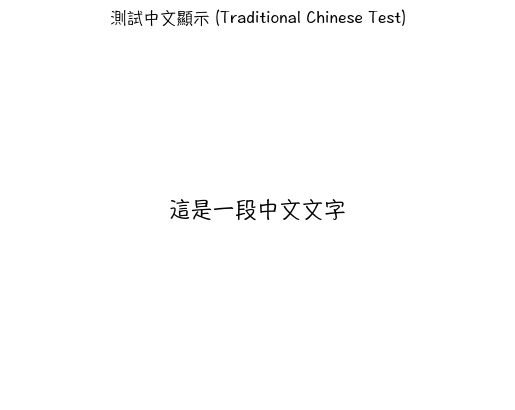

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set font to a Traditional Chinese-compatible font
rcParams['font.family'] = 'Hannotate SC'

# Test plot
plt.figure()
plt.title("測試中文顯示 (Traditional Chinese Test)")
plt.text(0.5, 0.5, "這是一段中文文字", fontsize=16, ha='center')
plt.axis('off')
plt.show()

1. Waveform Plot: Amplitude Over Time
- Purpose: The waveform is a time-domain representation of the audio signal, showing how the amplitude (loudness) of the audio changes over time.
- Why It's Useful: Dynamics: It helps identify loud and quiet sections in the song, which can indicate transitions, peaks, or drops. Clipping Detection: It can reveal if the audio is distorted due to clipping (amplitude exceeding the maximum allowed value). General Structure: You can visually observe the structure of the song, such as verses, choruses, or breakdowns, based on changes in amplitude.

2. Chroma Plot: Harmonic Features
- Purpose: A chroma feature visualizes the energy distribution across the 12 pitch classes (C, C#, D, etc.) in the musical scale over time. It captures harmonic and tonal content.
- Why It's Useful: Key and Chord Analysis: Helps identify the key of the song and track chord progressions.
Tonal Similarity: Useful for comparing the tonal structure of different songs or sections of the same song.
Melodic Patterns: Reveals harmonic patterns that are useful in music theory and composition.

3. Spectral Centroid Plot: Brightness of the Audio
- Purpose: The spectral centroid is the "center of mass" of the spectrum, indicating where most of the energy in the frequency domain is concentrated. It's often associated with the "brightness" of the sound.
- Why It's Useful: Brightness: A high spectral centroid corresponds to a "bright" sound (e.g., cymbals, high-pitched instruments), while a low centroid corresponds to a "dark" or "warm" sound (e.g., bass, low-pitched instruments). Instrument Detection: Can be used to distinguish between instruments or track changes in timbre over time. Genre Identification: Brighter sounds are more common in genres like EDM or pop, while darker sounds are more prominent in classical or ambient music.

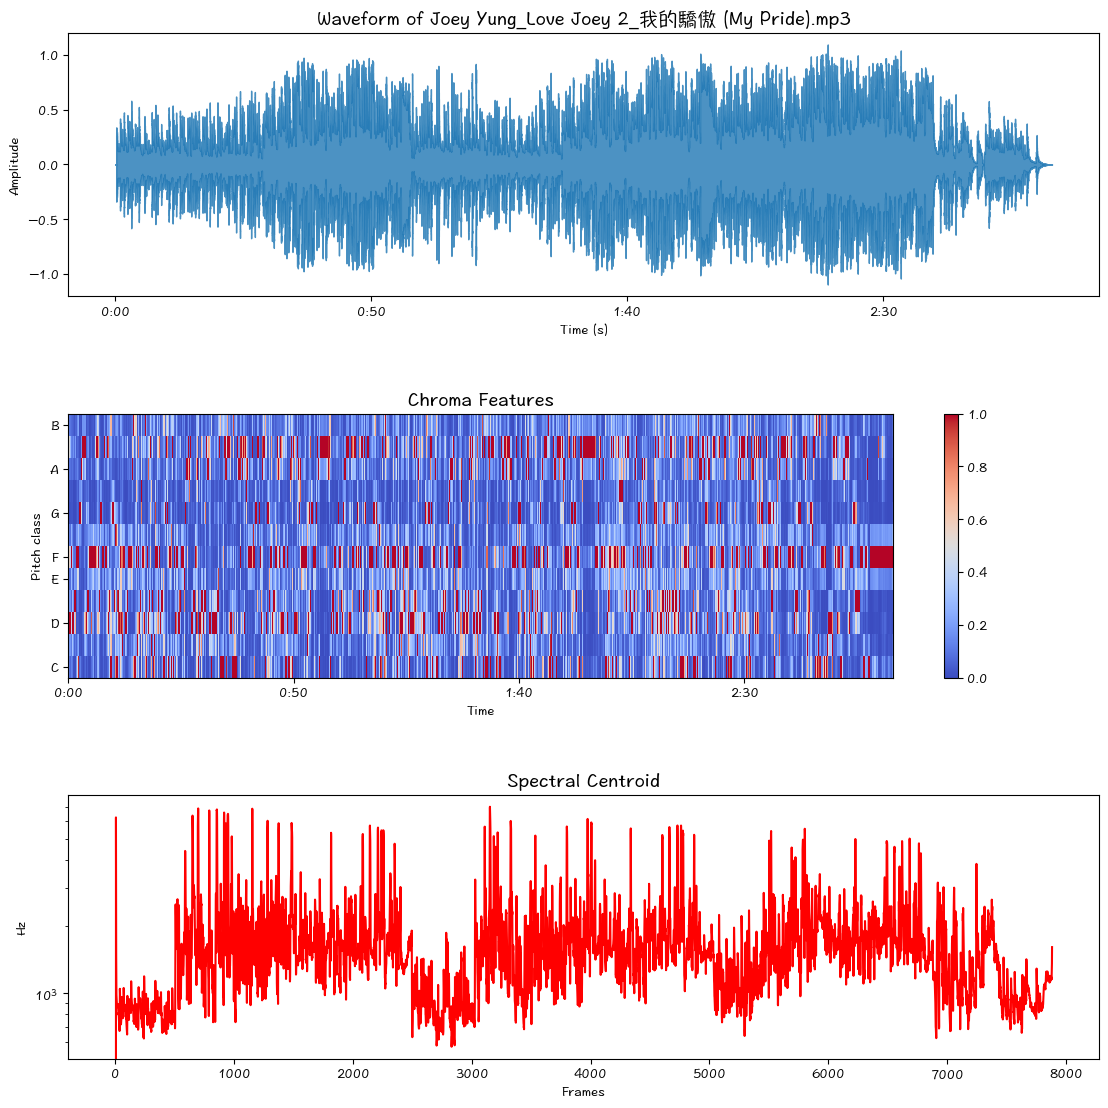

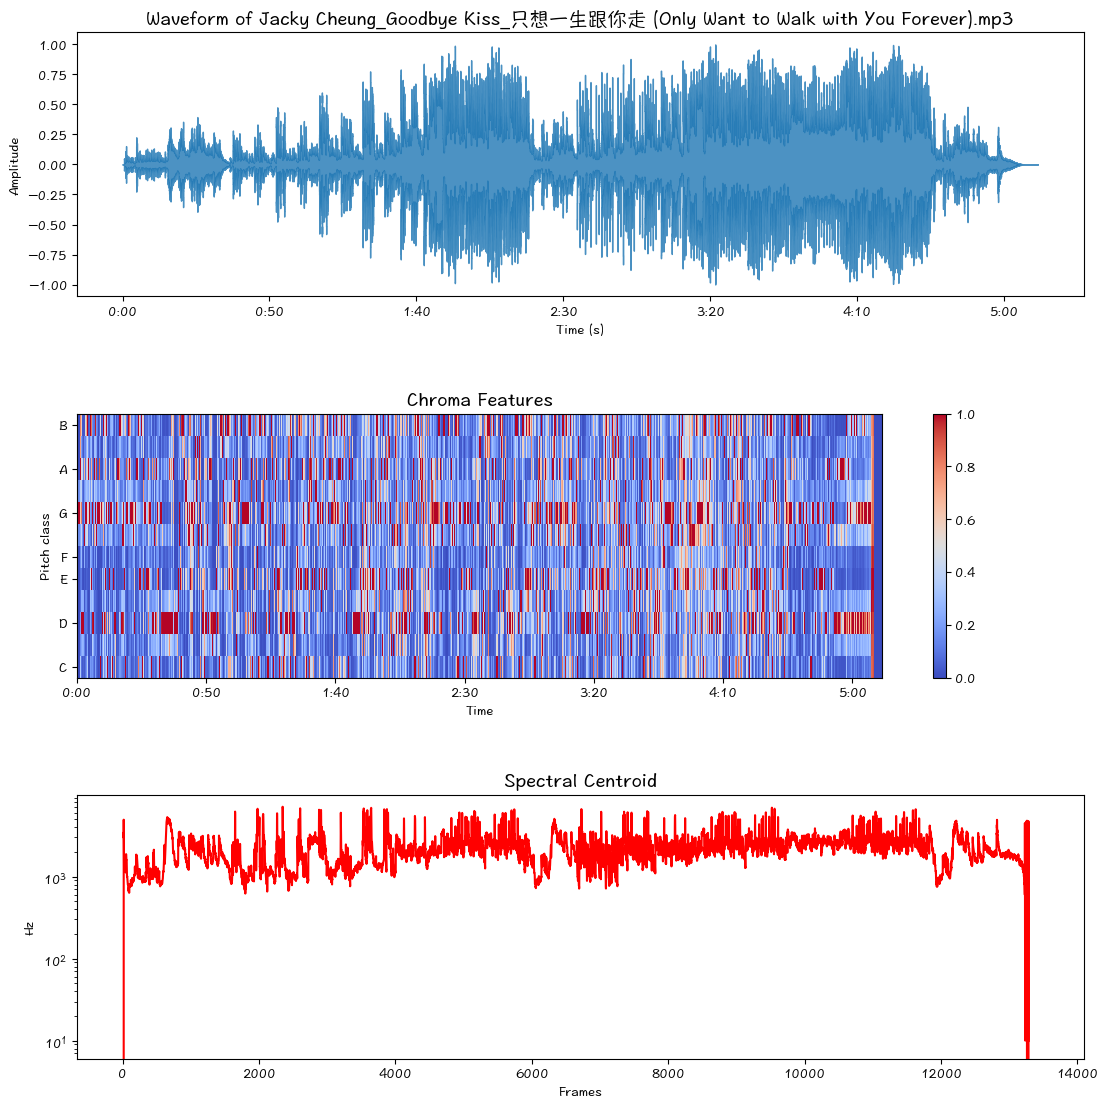

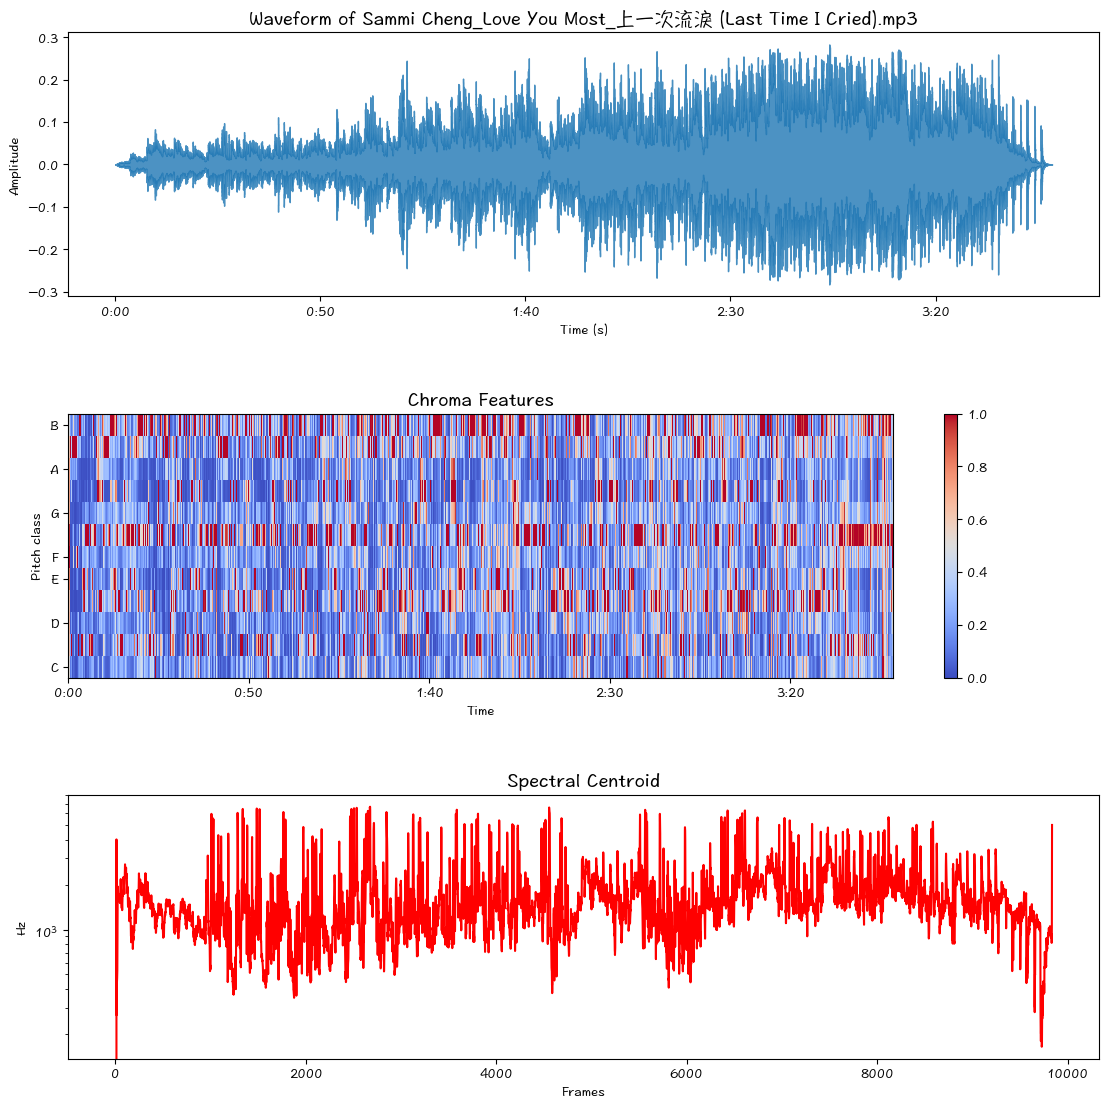

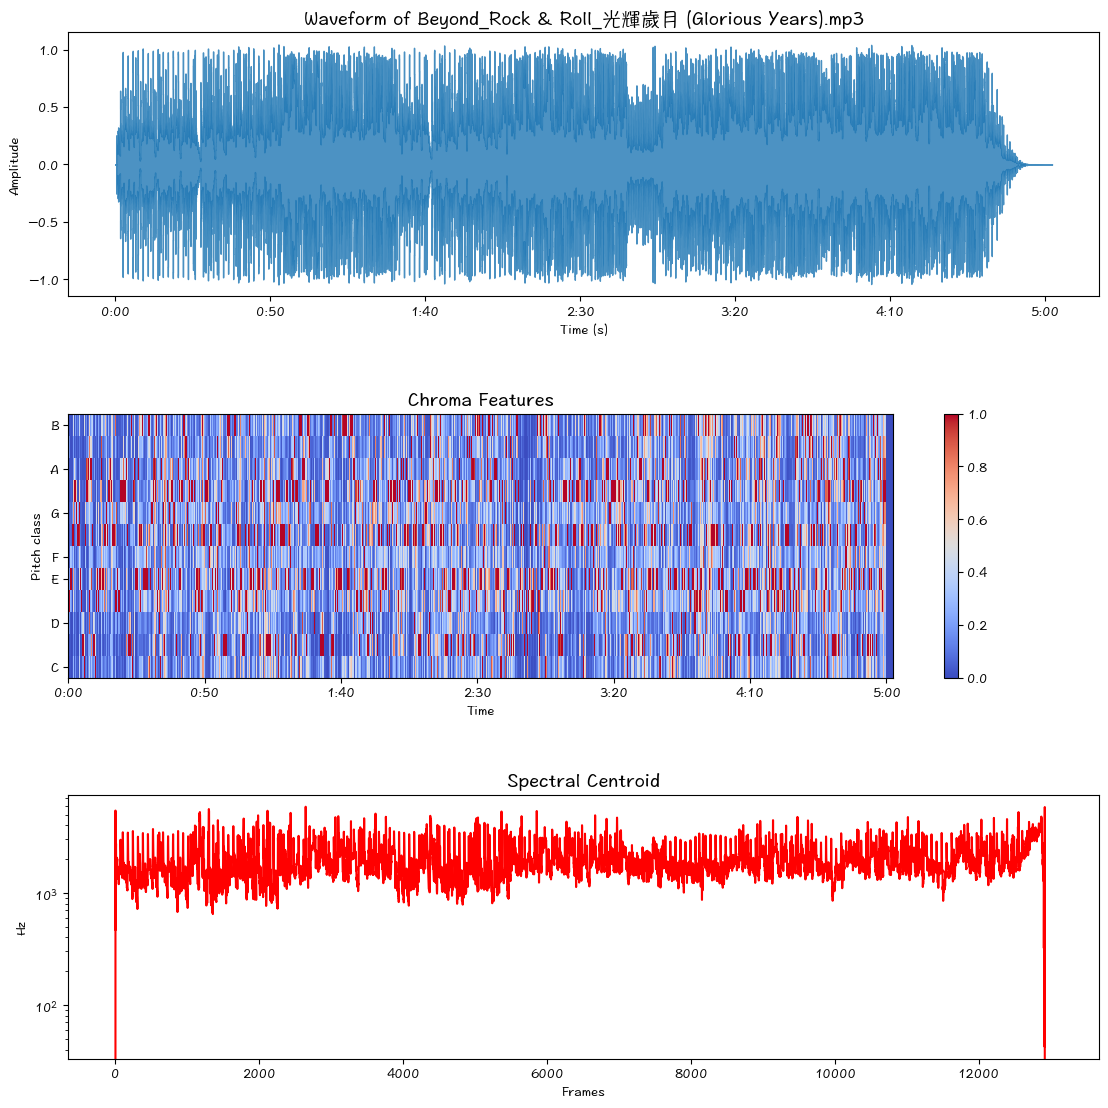

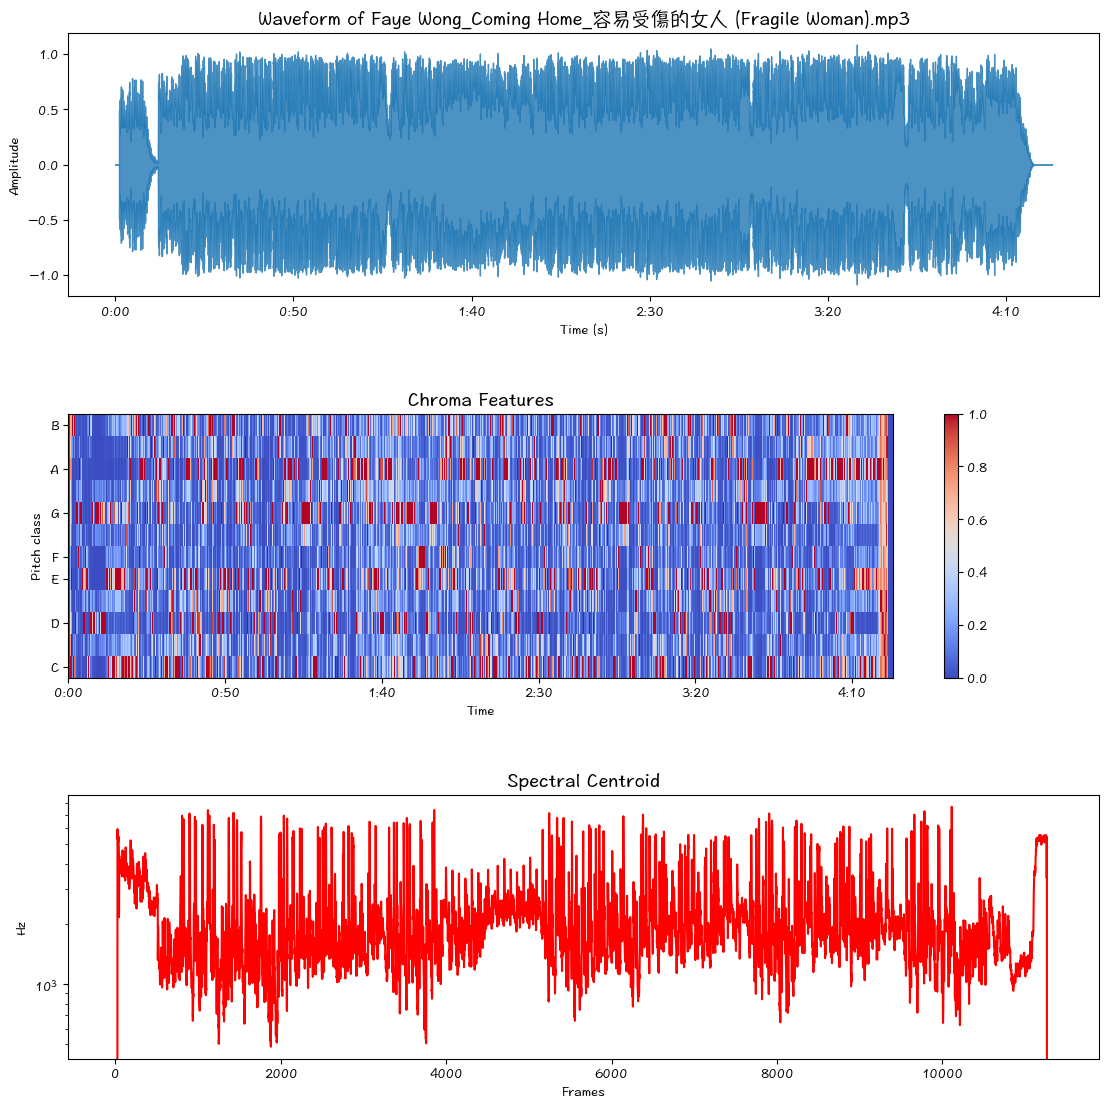

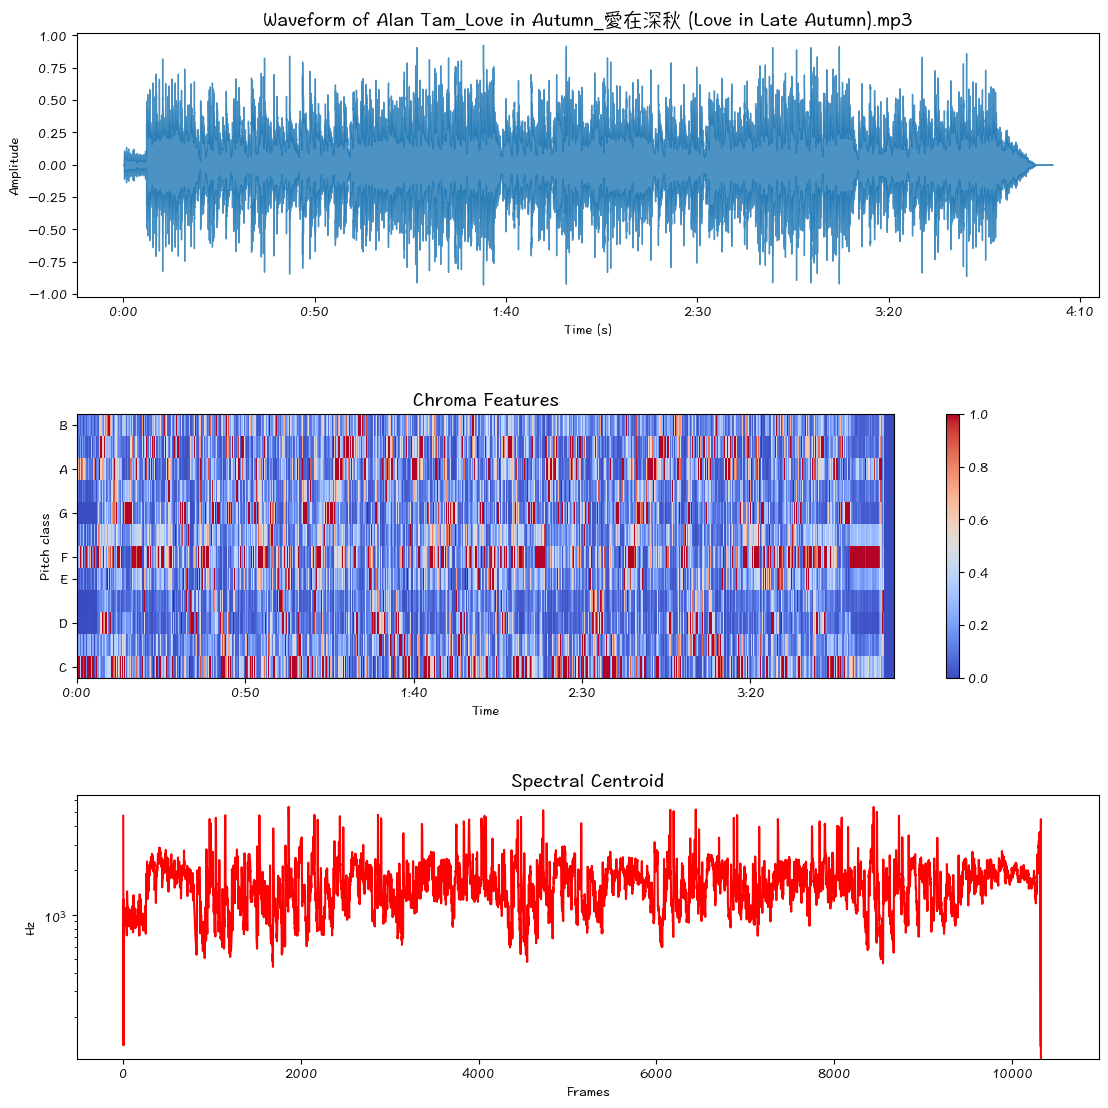

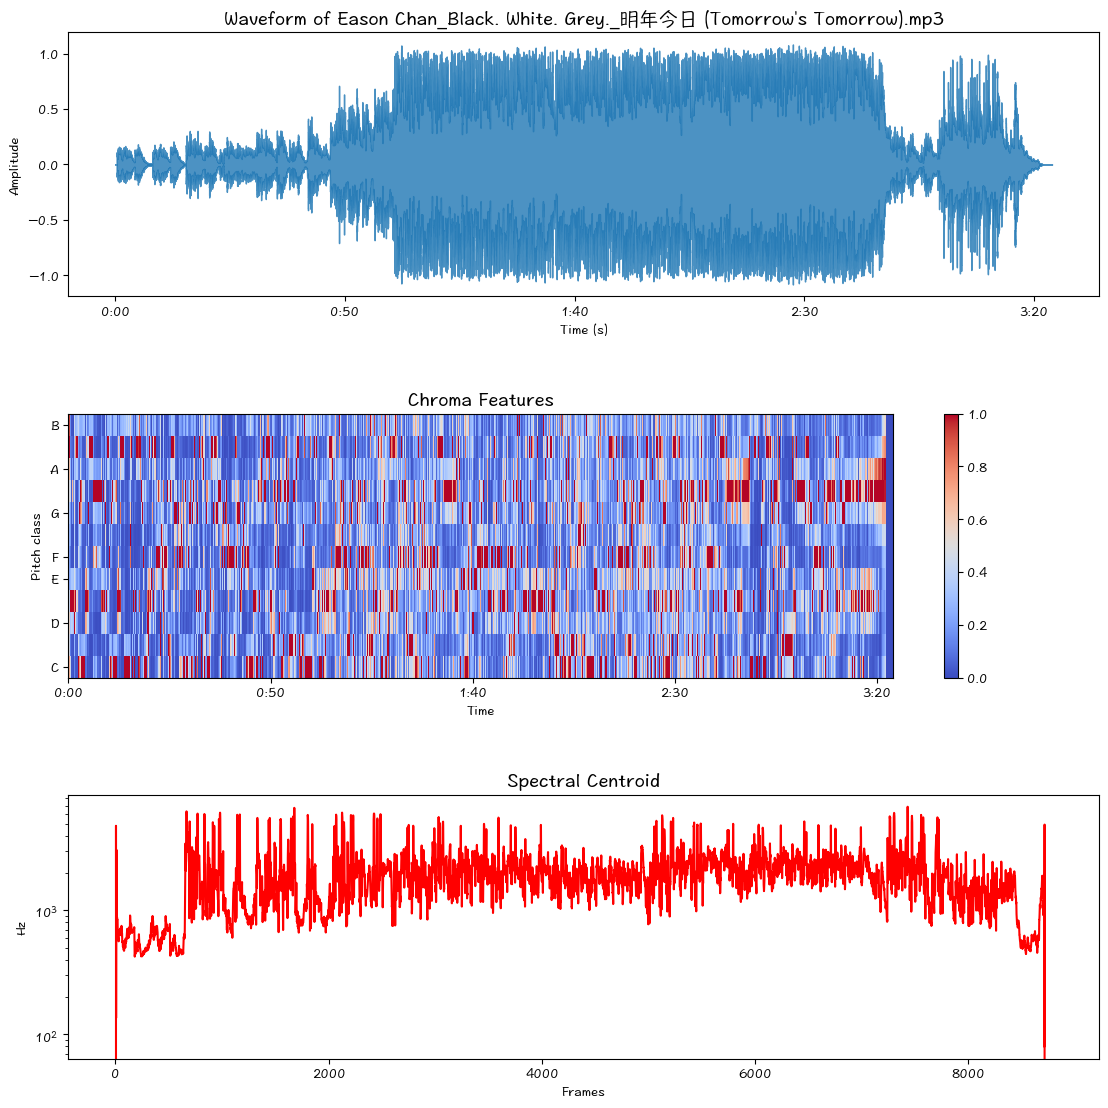

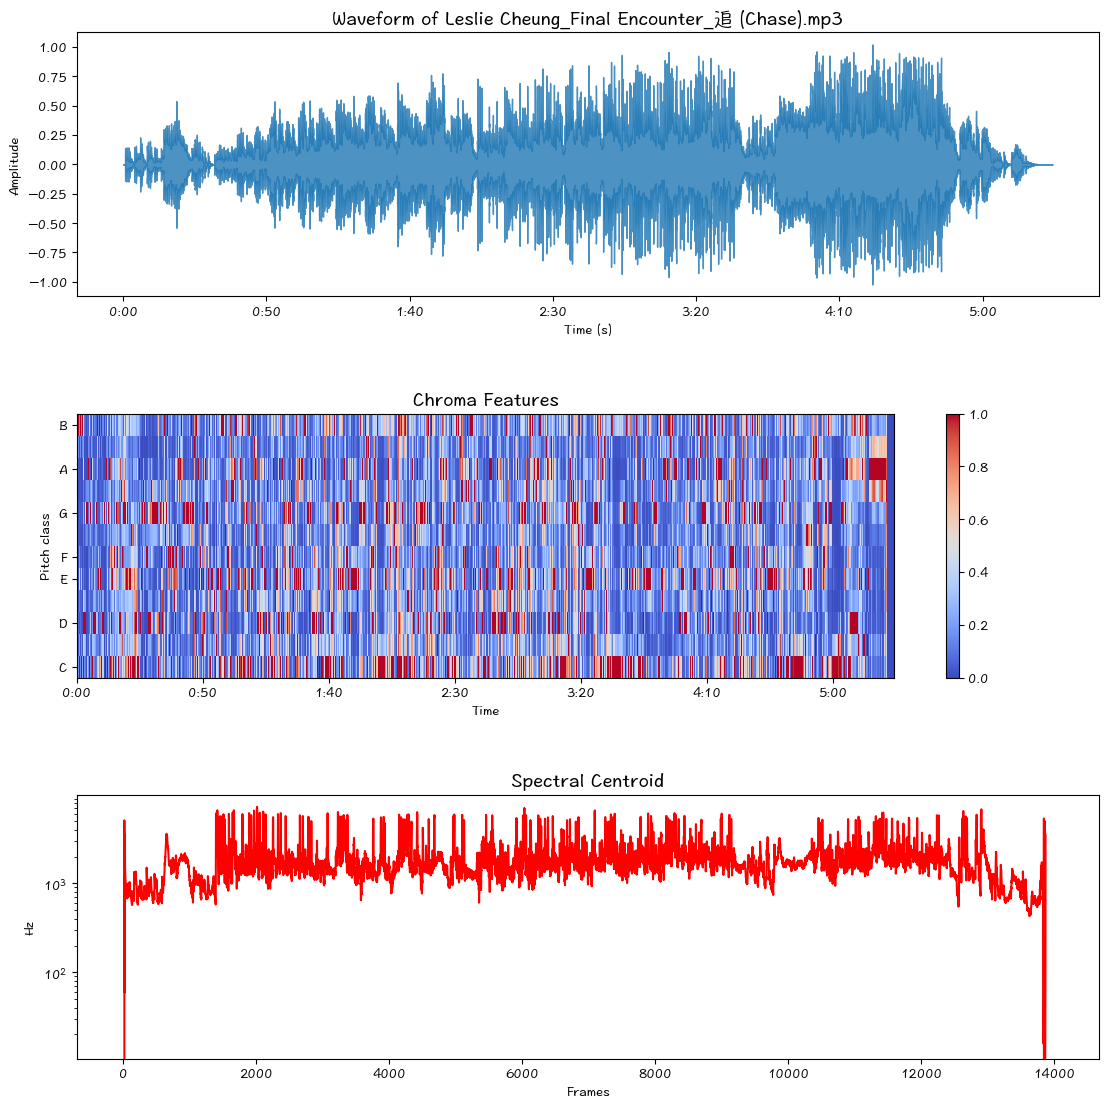

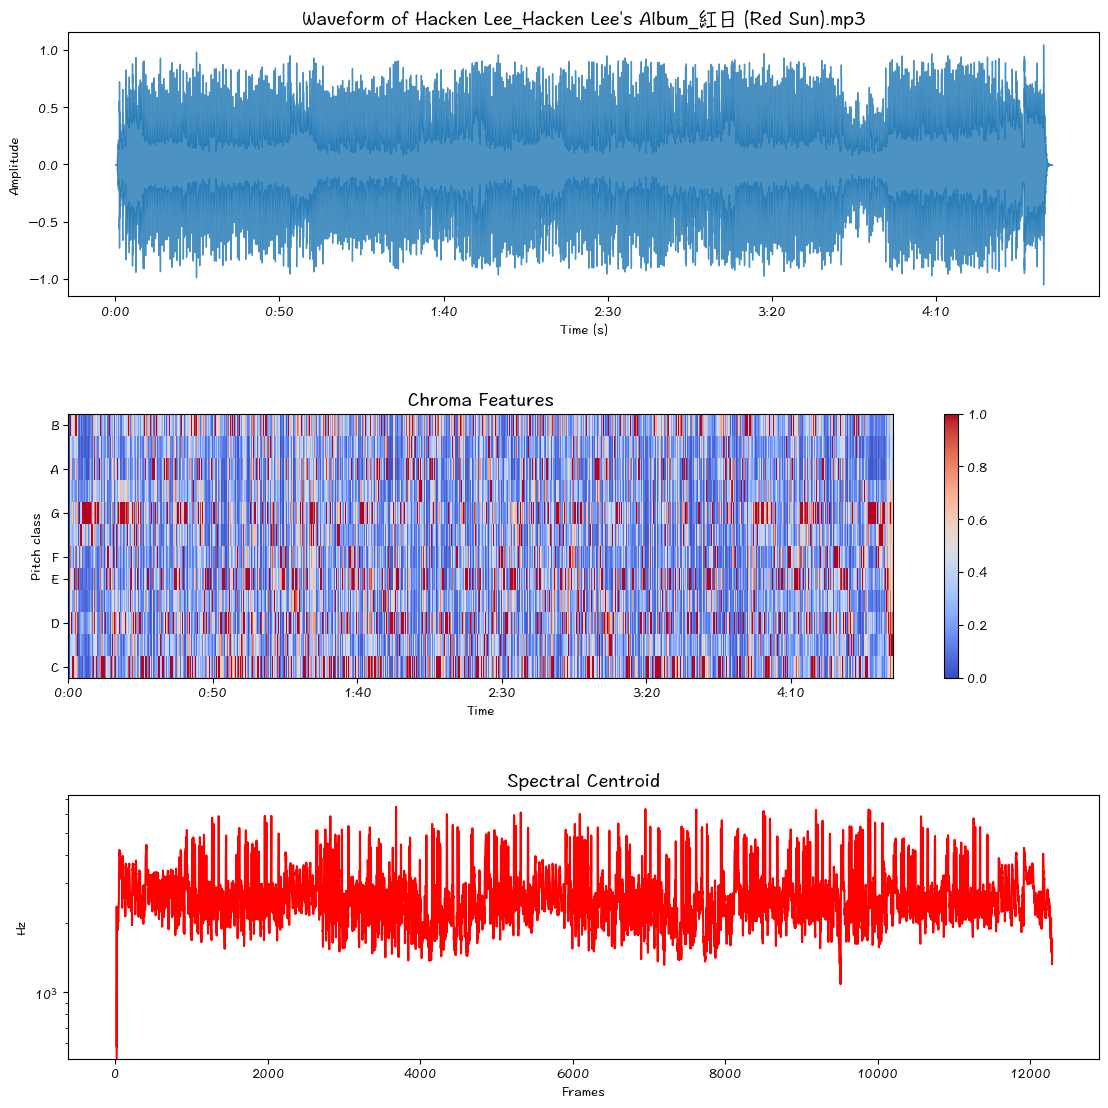

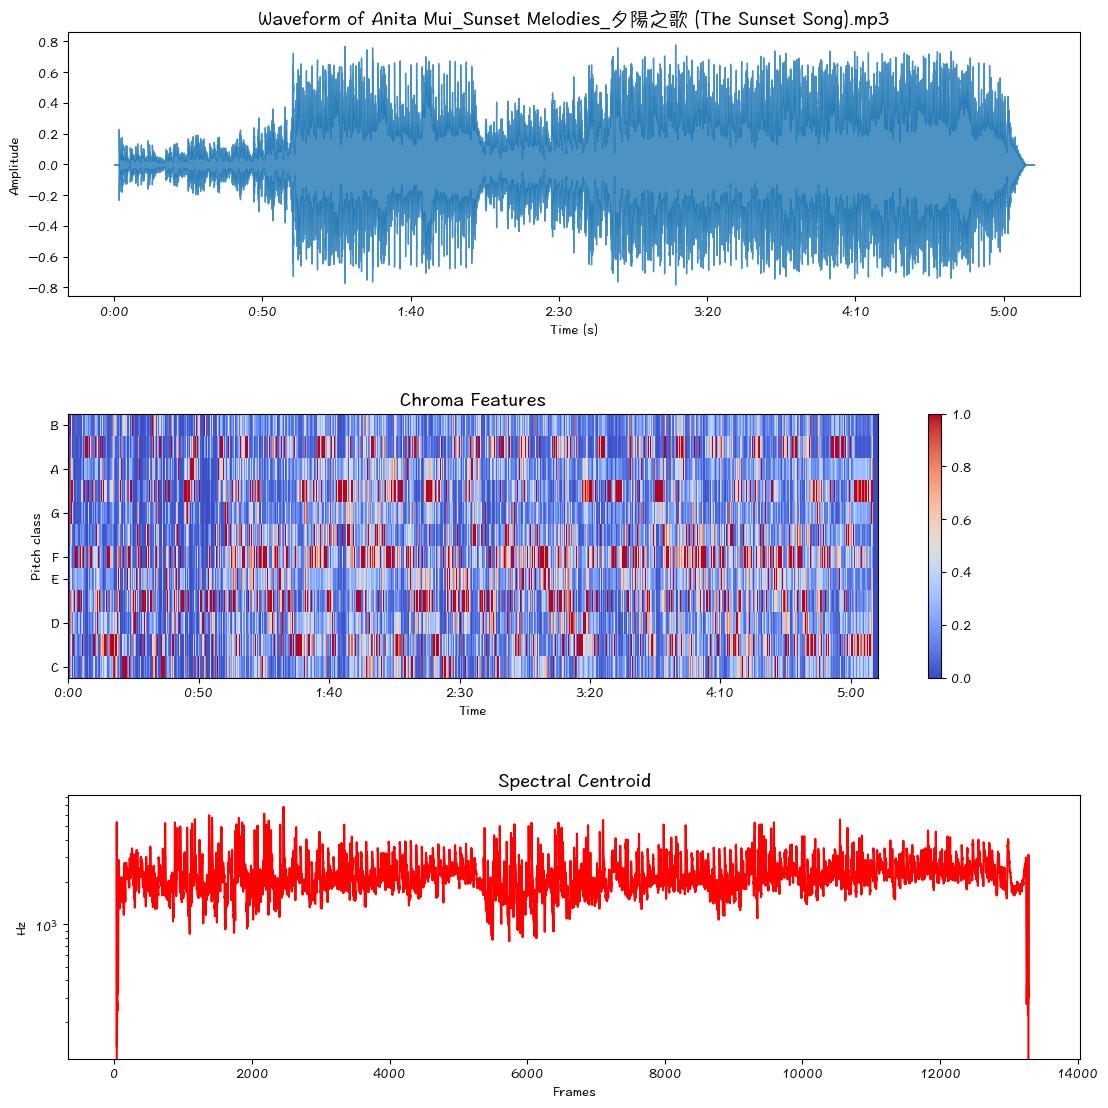

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# Set font for Traditional Chinese
rcParams['font.family'] = 'Hannotate SC'

# Path to the folder containing songs
songs_path = '../canto_songs'

# Function to extract audio features and plot them
def visualize_songs(path):
    if not os.path.exists(path):
        print(f"Directory {path} does not exist.")
        return

    audio_files = [f for f in os.listdir(path) if f.endswith(('.mp3', '.wav', '.flac'))]
    if not audio_files:
        print(f"No audio files found in {path}.")
        return

    for audio_file in audio_files:
        audio_path = os.path.join(path, audio_file)
        try:
            y, sr = librosa.load(audio_path)
            tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
            chroma = librosa.feature.chroma_stft(y=y, sr=sr)
            spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
            duration = librosa.get_duration(y=y, sr=sr)

            # Create the figure
            fig, axes = plt.subplots(3, 1, figsize=(12, 12))

            # Waveform
            axes[0].set_title(f"Waveform of {audio_file}", fontsize=14)
            librosa.display.waveshow(y, sr=sr, alpha=0.8, ax=axes[0])
            axes[0].set_xlabel("Time (s)")
            axes[0].set_ylabel("Amplitude")

            # Chroma Features
            axes[1].set_title("Chroma Features", fontsize=14)
            img = librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', sr=sr, cmap='coolwarm', ax=axes[1])
            fig.colorbar(img, ax=axes[1])

            # Spectral Centroid
            axes[2].set_title("Spectral Centroid", fontsize=14)
            axes[2].semilogy(spectral_centroid.T, label='Spectral Centroid', color='r')
            axes[2].set_xlabel("Frames")
            axes[2].set_ylabel("Hz")


            # Adjust subplot layout to avoid overlap
            plt.tight_layout(pad=4.0)

            # Show the plot
            plt.show()

        except Exception as e:
            print(f"Error processing {audio_file}: {e}")

# Run the visualization
visualize_songs(songs_path)